### Figure 1 graphs

In [15]:
from matplotlib import pyplot as plt
import pandas as ps
import numpy as np
import math as m
def getHeatMap(fname, force):
    mod =  np.delete(np.array(ps.read_csv('./compiledRuns/' + fname + '/heatmap_' + str(force) + '.txt',header=1)), 0, axis=1)
    mod = np.delete(mod, len(mod[0])-1,axis=1)
    return mod
def getDenProf(fname, force):
    return np.array(ps.read_csv('./compiledRuns/' + fname + '/ProfileDensity_' + str(force) + '.txt',header=1))
def genPotential(dim, rez):
    x = np.linspace(0,dim[0],rez[0])
    potential = np.cos(m.pi * 2 /dim[0] * x)
    for i in range(rez[1]):
        potential= np.vstack([potential,np.cos(m.pi * 2 * x)])
    return potential
def getIntersection(xd,yd, slope):

    thetas = xd
    tilt = yd
    l2 = [(0,0),(0.2,slope*0.2)]
    for p in range(0,len(thetas)):

        p2 = tilt[p]
        if p2 > slope * thetas[p] + tilt[0]:
            return (slope, round(thetas[p],3), tilt[p])
    return (slope,0.,0.)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2.4049416675615215e-05
2.1777850705599997e-05
3.37891828561e-05
3.884508655610001e-05
1.3661274831999998e-05
1.6157901288399993e-05
4.978993135009999e-05
2.059318020000001e-05
1.7525852440000006e-05
3.479336769000004e-05
[0.0013681963, 0.014840419999999998, 0.02726727, 0.04070583, 0.0540023, 0.06942426000000002, 0.08231897, 0.0969798, 0.10977840000000001, 0.12655290000000002]


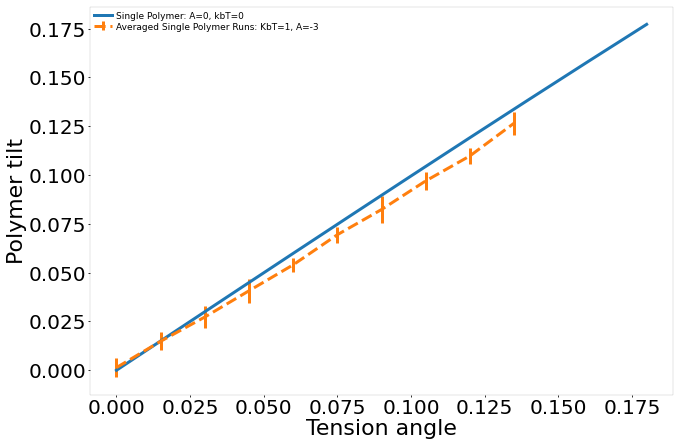

In [46]:
figure_1_folders = ['singlePolymer']
linear = range(10)
fig1data = []
fig1heatmaps = [[],[]]
linewidth=7.0
for name in figure_1_folders:
    fig1data.append(np.array(ps.read_csv(name + '/data.txt',header = 0)))
    #fig1heatmaps[0].append(getHeatMap(name,0.3))
    #fig1heatmaps[1].append(getHeatMap(name,1.2))
    
fig = plt.figure(figsize=(10,7))
ind = 0
forceanglea = np.linspace(0,3.6/20,10)
forceangleb = np.linspace(0,2.7/20,10)
print(forceangle)
for data in fig1data:
    
    plt.errorbar(forceanglea, data[3][1:],linewidth=3,label="Single Polymer: A=0, kbT=0")
    ind += 1

    

ax = plt.gca()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

namerange = list(range(1010,1020))
output = []
for path in namerange:
    data = np.array(ps.read_csv(f"compiledRuns/{path}/data.txt"))
    #print(data)
    #devdata = np.array(ps.read_csv(path + "/stddevdata.txt"))
    #plt.errorbar(np.linspace(0,3,10)/20, data[3][1:],fmt='.')
    output.append(data[3][1:])
    if output[-1][-1] < 0.02:
        print(path)
output = np.array(output)
averaged = [0] * len(output[0])
for element in output:
    for i in range(len(element)):
        averaged[i] +=element[i]
averagedu = [0] * len(output[0])
print(averagedu)
for i in range(len(averaged)):
    averaged[i] = averaged[i]/len(output)
    for element in output:
        averagedu[i] += pow(element[i] - averaged[i],2)/len(output)
    print(averagedu[i])
    averagedu[i] = math.sqrt(averagedu[i])


print(averaged)
plt.errorbar(np.linspace(0,2.7,10)/20,averaged,fmt='--',yerr= averagedu,linewidth=3, label="Averaged Single Polymer Runs: KbT=1, A=-3")
plt.legend()
plt.ylabel("Polymer tilt",fontsize=22)
plt.xlabel("Tension angle",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("slope_comp.jpeg")

In [24]:

fig_width = 3.46  # width in inches : 85 mm one-column format
fig_height = fig_width*3./4.      # height in inches
print(fig_height)
fig_size =  [fig_width,fig_height]
params = {
            #~ 'backend': 'PDF',

          
          'axes.labelsize': 9,
          'axes.labelpad':1,
          'axes.linewidth':.1,
          'font.size': 11,
          'legend.fontsize': 9,
          'xtick.labelsize': 7,
          'ytick.labelsize': 7,
          
          'figure.subplot.left' : 0.16,
          'figure.subplot.right' : 0.97,
          'figure.subplot.bottom' : 0.13,
          'figure.subplot.top' : 0.9,
          #~ 'figure.subplot.wspace' : 0.3,
          
          'legend.labelspacing' : 0.2,
          'legend.handletextpad' : 0.4,
          'legend.borderpad' : 0.,
          'legend.frameon': False,
          'legend.numpoints' : 1,
          'legend.columnspacing' : 1,
         
          'lines.linewidth' : 1.4,
          'lines.markersize' : 4,
          'lines.markeredgewidth' : .4,  

          'xtick.major.pad' : 2, 
          'ytick.major.pad' : 2, 
    
          'figure.figsize': fig_size,
          
          #'text.usetex' : True,
          'font.family' : 'sans-serif',
          'font.serif' : 'DejaVu Sans',
          'mathtext.fontset' : 'dejavusans',
          # 'mathtext.it' : 'serif:italic',
          # 'mathtext.default' : 'it',
          
          'xtick.major.size' : 2,
          'ytick.major.size' : 2
          }
plt.rcParams.update(params)

dblfigsize=(7.1,2.7)

    
def colormu(mu,colormap='inferno',muvals=[0.4,0.7,1.0,1.3,1.7]):
    # space out values
    # muvals=[0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.5,3.0,4.0]
    # muvals = [0.4,0.7,1.0,1.3,1.6]
    muidx = dict([])
    for m in muvals:
        muidx[m] = np.searchsorted(muvals,mu)
    
    cfunc = matplotlib.cm.get_cmap(colormap)
    cnorm = matplotlib.colors.Normalize(vmin=0,vmax=len(muvals))
    # print 'color', mu, cfunc(cnorm(muidx[mu]))

    return cfunc(cnorm(muidx[mu]))
    
def colormu2(mu,colormap='viridis',muvals=[0.5,1.0,1.5,2.0,2.5,3.0]):
    # space out values
    # muvals=[0.5,1.0,1.5,2.0,2.2,2.4,2.5,2.6,2.8,3.0,3.5,4.0,6.0]
    # muvals=[1.0,1.5,2.0,2.5,3.0]
    muidx = dict([])
    for m in muvals:
        muidx[m] = np.searchsorted(muvals,mu)
    
    cfunc = matplotlib.cm.get_cmap(colormap)
    cnorm = matplotlib.colors.Normalize(vmin=0,vmax=len(muvals))
    # print 'color', mu, cfunc(cnorm(muidx[mu]))

    return cfunc(cnorm(muidx[mu]))

axl = .08
axb = .16
axw = .38
axh = .74

axd = (1-axl-2*axw)/1.7

def dblpanelfig(figsize=dblfigsize,axl=axl,axb=axb,axw=axw,axh=axh,axd=axd):
    plt.figure(figsize=figsize)

    ax1,ax2 = [plt.axes([axl,axb,axw,axh]),
               plt.axes([axl+axw+axd,axb,axw,axh])]

    return ax1, ax2

# common data folder
dataprefix = '../data/'

def smalldblpanel():
    return dblpanelfig(figsize=(fig_width,fig_height*.6),axl=.14,axb=.2,axw = axw*.97,axh=axh*.97)

# symbols
syms1d = {0.7:'>',1.0: '^', 1.3: 'v', 1.7: '<'}
syms2d = {1.5: 's', 2.0: 'o', 2.5: '*'}

2.5949999999999998


In [47]:
foldernames = ["3000000/profiledata_0.0.txt","3000000/profiledata_2.1.txt","1010/profiledata_0.0"]
for name in foldernames:
    data = np.array(ps.read_csv(f"compiledRuns/{name}"))
    np.flip(data,0)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(genPotential((10,3),(1000,100)),cmap='bone',origin='lower',extent=[5,-5,-15,-51])
    if name == "singlepolymer_sheer_0":
        plt.plot(data[:,0],data[:,1] - 53.3,'o',marker="o", markersize=10,color='orange')
        
    else:
        plt.plot(data[:,0],data[:,1],'o',marker="o", markersize=10,color='orange')
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.gca().set_aspect(0.25)
    
    plt.savefig(f"{name}.png",bbox_inches='tight',pad_inches = 0)

EmptyDataError: No columns to parse from file

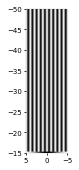

In [5]:
plt.imshow(genPotential((10,3),(100,100)),cmap='gray',origin='lower',extent=[5,-5,-15,-50])

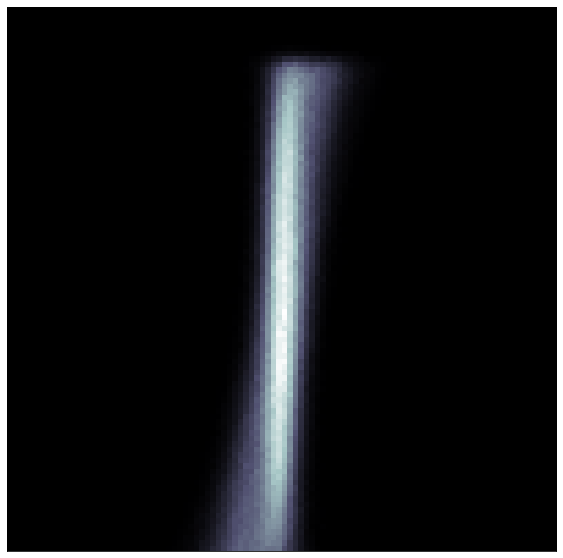

In [10]:
profiledensities = ["3000000/ProfileDensity_2.7.txt"]
data = np.array(ps.read_csv(f"compiledRuns/{profiledensities[-1]}",header=1))
fig = plt.figure(figsize=(10,10))
plt.imshow(data,origin='lower',cmap='bone')
plt.tick_params(left=False,
            bottom=False,
            labelleft=False,
            labelbottom=False)
plt.show()
#plt.savefig(f"{name}.png",bbox_inches='tight',pad_inches = 0)

/home/alexander/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
No handles with labels found to put in legend.


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2.4049416675615215e-05
2.1777850705599997e-05
3.37891828561e-05
3.884508655610001e-05
1.3661274831999998e-05
1.6157901288399993e-05
4.978993135009999e-05
2.059318020000001e-05
1.7525852440000006e-05
3.479336769000004e-05
[0.0013681963, 0.014840419999999998, 0.02726727, 0.04070583, 0.0540023, 0.06942426000000002, 0.08231897, 0.0969798, 0.10977840000000001, 0.12655290000000002]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6.457960943832678e-07
3.0027616626371834e-06
9.28315472052713e-06
3.086221534084689e-05
7.214350704309321e-05
0.0001338872609508288
0.00020556514664113286
0.00023517260615265302
0.0002503175216049396
0.0004129261182012661
[-0.00020177623959183677, 0.0026138355714285712, 0.006101331367346937, 0.011897589795918368, 0.023123550816326523, 0.03721737551020408, 0.051234473469387753, 0.06776484285714285, 0.0851228469387755, 0.09647804693877551]
[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]


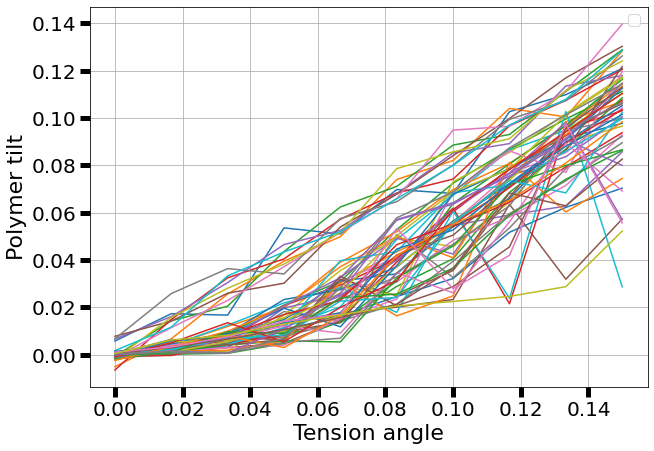

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.2285636012115169e-07
2.60440078266395e-07
4.2076182368768986e-07
8.494362844754668e-06
2.6318910007199997e-05
1.2036494264444434e-05
6.71515292172839e-06
2.4799024550617257e-06
3.26414222222223e-06
3.3068168888888765e-06
[0.00012890974333333333, 8.279977777777782e-05, 0.0005489167111111111, 0.003832637333333334, 0.019551770000000007, 0.05277843333333334, 0.07432117777777779, 0.09255112222222223, 0.10903366666666667, 0.12610866666666667]
[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]


/home/alexander/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


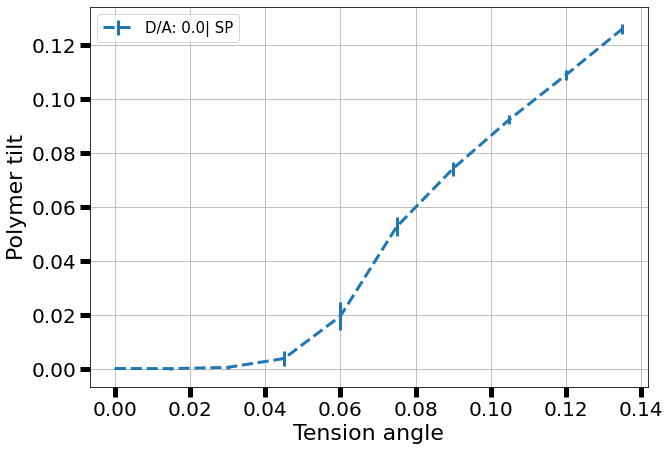

In [65]:

ranges = []
namerange = list(range(3000000,3000009))

da = ['0.0| SP','0.4 | MP','0.7 | MP','1 | MP']


import numpy as np 
from matplotlib import pyplot as plt
import matplotlib
import math
import pandas as ps
fig = plt.figure(figsize=(10,7))
ind = 0

output = []
for path in namerange:
    data = np.array(ps.read_csv(f"compiledRuns/{path}/data.txt"))
    #devdata = np.array(ps.read_csv(path + "/stddevdata.txt"))
    #plt.errorbar(np.linspace(0,3,10)/20, data[3][1:],fmt='.')
    output.append(data[3][1:])
    if output[-1][-1] < 0.02:
        print(path)
output = np.array(output)
averaged = [0] * len(output[0])
for element in output:
    for i in range(len(element)):
        averaged[i] +=element[i]
averagedu = [0] * len(output[0])
print(averagedu)
for i in range(len(averaged)):
    averaged[i] = averaged[i]/len(output)
    for element in output:
        averagedu[i] += pow(element[i] - averaged[i],2)/len(output)
    print(averagedu[i])
    averagedu[i] = math.sqrt(averagedu[i])


print(averaged)
plt.errorbar(np.linspace(0,2.7,10)/20,averaged,fmt='--',yerr= averagedu,linewidth=3, label=f"D/A: {da[ind]}")
ind +=1
#data = np.array(ps.read_csv(f"compiledRuns/10000/data.txt"))
    #print(data)
    #devdata = np.array(ps.read_csv(path + "/stddevdata.txt"))
#plt.errorbar(np.linspace(0,3,10)/20, data[3][1:],linewidth=3,label="Muli-Polymer System")
plt.ylabel("Polymer tilt",fontsize=22)
plt.xlabel("Tension angle",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = plt.axes()
plt.grid()
ax.tick_params(axis='both', width=5,length=10)
plt.legend(prop={'size': 15})
plt.savefig("notfilled.jpeg")
print(np.linspace(0,2.7,10))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2.4049416675615215e-05
2.1777850705599997e-05
3.37891828561e-05
3.884508655610001e-05
1.3661274831999998e-05
1.6157901288399993e-05
4.978993135009999e-05
2.059318020000001e-05
1.7525852440000006e-05
3.479336769000004e-05
[0.0013681963, 0.014840419999999998, 0.02726727, 0.04070583, 0.0540023, 0.06942426000000002, 0.08231897, 0.0969798, 0.10977840000000001, 0.12655290000000002]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.1829822815116227e-07
2.452192823082e-07
4.0658031515413444e-07
7.985033870523042e-06
3.3017215290849004e-05
1.8362819884399997e-05
6.051663400399997e-06
2.2836396468999984e-06
3.285710010000007e-06
3.1087040099999876e-06
[9.9607669e-05, 0.00011747800000000003, 0.0006045890399999999, 0.0036382416, 0.018533591000000006, 0.051863740000000005, 0.07435104000000001, 0.09247531, 0.1092303, 0.1259873]


/home/alexander/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]


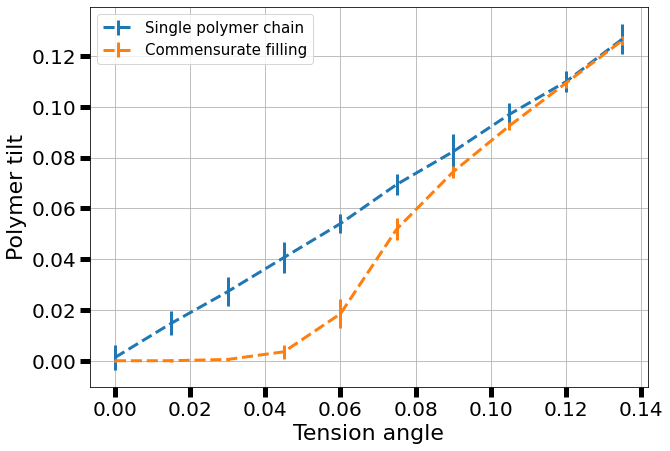

In [73]:

ranges = []
namerange = list(range(1010,1020))

r2 = list(range(3000000,3000010))
da = ['Single polymer chain','Commensurate filling']
ranges.append(namerange)
ranges.append(r2)

import numpy as np 
from matplotlib import pyplot as plt
import matplotlib
import math
import pandas as ps
fig = plt.figure(figsize=(10,7))
ind = 0
for r in ranges:
    output = []
    for path in r:
        data = np.array(ps.read_csv(f"compiledRuns/{path}/data.txt"))
        #print(data)
        #devdata = np.array(ps.read_csv(path + "/stddevdata.txt"))
        #plt.errorbar(np.linspace(0,3,10)/20, data[3][1:],fmt='.')
        output.append(data[3][1:])
        if output[-1][-1] < 0.02:
            print(path)
    output = np.array(output)
    averaged = [0] * len(output[0])
    for element in output:
        for i in range(len(element)):
            averaged[i] +=element[i]
    averagedu = [0] * len(output[0])
    print(averagedu)
    for i in range(len(averaged)):
        averaged[i] = averaged[i]/len(output)
        for element in output:
            averagedu[i] += pow(element[i] - averaged[i],2)/len(output)
        print(averagedu[i])
        averagedu[i] = math.sqrt(averagedu[i])

    
    print(averaged)
    plt.errorbar(np.linspace(0,2.7,10)/20,averaged,fmt='--',yerr= averagedu,linewidth=3, label=f"{da[ind]}")
    ind +=1
    #data = np.array(ps.read_csv(f"compiledRuns/10000/data.txt"))
        #print(data)
        #devdata = np.array(ps.read_csv(path + "/stddevdata.txt"))
    #plt.errorbar(np.linspace(0,3,10)/20, data[3][1:],linewidth=3,label="Muli-Polymer System")
plt.ylabel("Polymer tilt",fontsize=22)
plt.xlabel("Tension angle",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = plt.axes()
plt.grid()
ax.tick_params(axis='both', width=5,length=10)
plt.legend(prop={'size': 15})
plt.savefig("compvalue.jpeg")
plt.savefig("compvalues.png", transparent = True,bbox_inches='tight',pad_inches = 0)
print(np.linspace(0,2.7,10))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2.4049416675615215e-05
2.1777850705599997e-05
3.37891828561e-05
3.884508655610001e-05
1.3661274831999998e-05
1.6157901288399993e-05
4.978993135009999e-05
2.059318020000001e-05
1.7525852440000006e-05
3.479336769000004e-05
[0.0013681963, 0.014840419999999998, 0.02726727, 0.04070583, 0.0540023, 0.06942426000000002, 0.08231897, 0.0969798, 0.10977840000000001, 0.12655290000000002]
[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]


/home/alexander/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


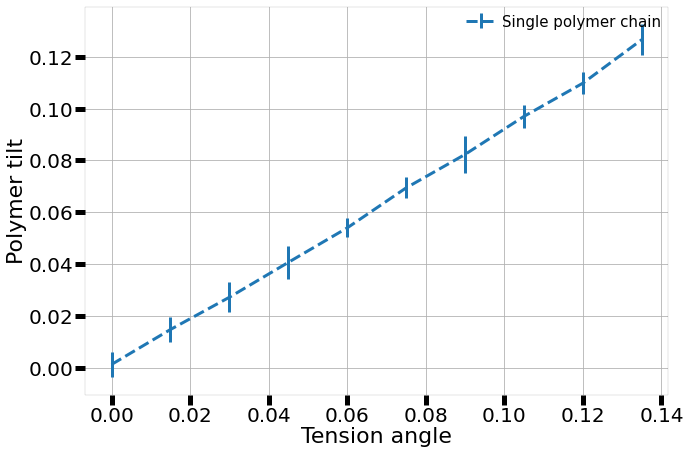

In [41]:

ranges = []
namerange = list(range(1010,1020))

da = ['Single polymer chain','Commensurate filling']
ranges.append(namerange)
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib
import math
import pandas as ps
fig = plt.figure(figsize=(10,7))
ind = 0
for r in ranges:
    output = []
    for path in r:
        data = np.array(ps.read_csv(f"compiledRuns/{path}/data.txt"))
        #print(data)
        #devdata = np.array(ps.read_csv(path + "/stddevdata.txt"))
        #plt.errorbar(np.linspace(0,3,10)/20, data[3][1:],fmt='.')
        output.append(data[3][1:])
        if output[-1][-1] < 0.02:
            print(path)
    output = np.array(output)
    averaged = [0] * len(output[0])
    for element in output:
        for i in range(len(element)):
            averaged[i] +=element[i]
    averagedu = [0] * len(output[0])
    print(averagedu)
    for i in range(len(averaged)):
        averaged[i] = averaged[i]/len(output)
        for element in output:
            averagedu[i] += pow(element[i] - averaged[i],2)/len(output)
        print(averagedu[i])
        averagedu[i] = math.sqrt(averagedu[i])

    
    print(averaged)
    plt.errorbar(np.linspace(0,2.7,10)/20,averaged,fmt='--',yerr= averagedu,linewidth=3, label=f"{da[ind]}")
    ind +=1
plt.ylabel("Polymer tilt",fontsize=22)
plt.xlabel("Tension angle",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = plt.axes()
plt.grid()
ax.tick_params(axis='both', width=5,length=10)
plt.legend(prop={'size': 15})
print(np.linspace(0,2.7,10))